In [57]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
import time
from scipy.stats import randint


In [58]:
class MLModelTrainer:

    def __init__(self, data_file, X_column, y_column, n_gram_range=(3,3), test_size=0.2, random_state=42):
        self.data_file = data_file
        self.X_column = X_column
        self.y_column = y_column
        self.n_gram_range = n_gram_range
        self.test_size = test_size
        self.random_state = random_state

    def process_data(self):

        # use vectorizer to process the data
        df = pd.read_csv(self.data_file)
        df.dropna(subset=['Review'], inplace=True)
        ratings_to_keep = ['1', '2', '3', '4', '5']
        filtered_df = df[df['Rating'].isin(ratings_to_keep)]

        return filtered_df
    
    def load_data(self, df):

        vectorizer = TfidfVectorizer(analyzer='char', ngram_range=self.n_gram_range,
                                     stop_words={'english'})
        X = vectorizer.fit_transform(df[self.X_column])
        y = df[self.y_column].astype(int)
        return X, y


    def split_data(self, X, y):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        return X_train, X_test, y_train, y_test

    def train_model(self, choosen_model, X_train, y_train):

        model = choosen_model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1_sc = f1_score(y_test, y_pred, average='weighted')
        return accuracy, f1_sc, y_pred

    def draw_confusion_matrix(self, y_test, y_pred):
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()


In [59]:
path_to_data = '../Data/Restaurant reviews.csv'
X = 'Review'
y = 'Rating'
# data file --> process_data ---> df ---> load_data --> X, y

model1 = RandomForestClassifier(n_estimators=500, random_state=42)
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                    max_depth=10, random_state=42)

In [60]:
def training(model_to_train, X, y, n_grams=(3, 3)):

    trainer = MLModelTrainer(path_to_data, X, y, n_grams)
    filtered_df = trainer.process_data()
    X, y = trainer.load_data(filtered_df)
    X_train, X_test, y_train, y_test = trainer.split_data(X, y)
    tr_model = trainer.train_model(model_to_train, X_train, y_train)

    accuracy, f1_sc, y_pred = trainer.evaluate_model(tr_model, X_test, y_test)
    print(f"Accuray is: {accuracy}\n F1_score is {f1_sc}")
    trainer.draw_confusion_matrix(y_test, y_pred)


________Model using: random forest________
________n_gram value is (1, 1)________
Accuray is: 0.4872579001019368
 F1_score is 0.4217003876392919
________n_gram value is (2, 2)________
Accuray is: 0.564729867482161
 F1_score is 0.500184788914095
________n_gram value is (3, 3)________
Accuray is: 0.6044852191641182
 F1_score is 0.5429230133878872
________n_gram value is (4, 4)________
Accuray is: 0.6151885830784913
 F1_score is 0.5549138121003395
________n_gram value is (5, 5)________
Accuray is: 0.6085626911314985
 F1_score is 0.5458931454793665


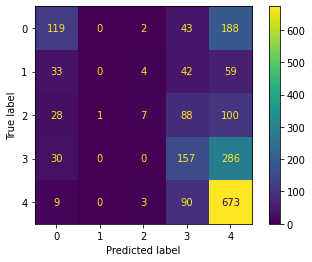

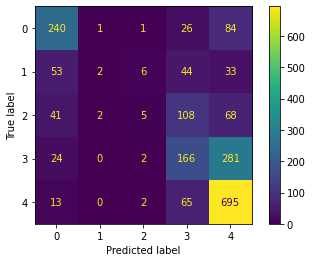

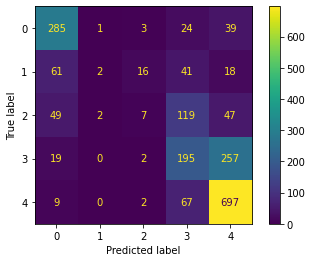

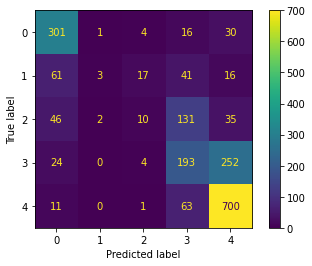

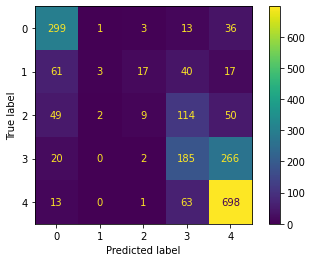

In [61]:
n_grams = [(1, 1), (2, 2), (3, 3), (4, 4), (5,5)]
print("________Model using: random forest________")
for n_gram in n_grams:
    print(f"________n_gram value is {n_gram}________")
    training(model1, X, y, n_gram)

________Model using: random forest________
________n_gram value is (1, 1)________
Accuray is: 0.4954128440366973
 F1_score is 0.4660290632898848
________n_gram value is (2, 2)________
Accuray is: 0.5744138634046891
 F1_score is 0.5569057660095897
________n_gram value is (3, 3)________
Accuray is: 0.6172273190621814
 F1_score is 0.6001580542869552
________n_gram value is (4, 4)________
Accuray is: 0.6269113149847095
 F1_score is 0.607298960181182
________n_gram value is (5, 5)________
Accuray is: 0.6172273190621814
 F1_score is 0.5955719325138953


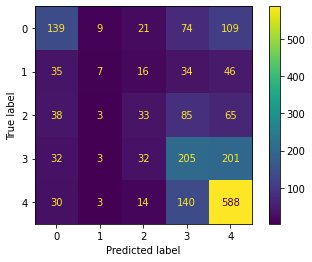

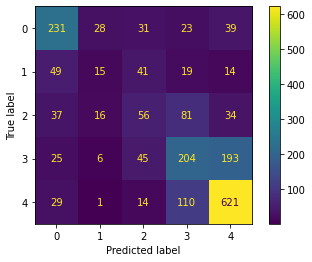

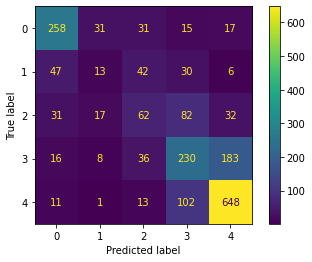

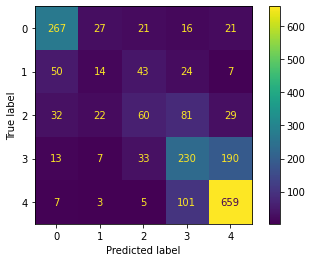

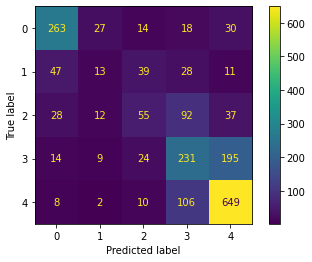

In [62]:
n_grams = [(1, 1), (2, 2), (3, 3), (4, 4), (5,5)]
print("________Model using: random forest________")
for n_gram in n_grams:
    print(f"________n_gram value is {n_gram}________")
    training(model_2, X, y, n_gram)